In [ ]:
# Моделирование и обработка выборки из дискретного закона.
# k: 8; p: 0.6; n: 180;

# Лабораторная работа № 2 по Математической Статистике;
# Вариант 13;
# Выполнил: Фомин Олег Витальевич;
# Группа: ФН11-53Б;

In [ ]:
# 1. Для данных значений k, p и n смоделируйте выборку из биномиального закона распределения.

# Подключение библиотек:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

# Функция вычисления вероятности для каждой случайной величины:
def P_k(k, n = 8, p=6/10):
    return math.comb(n, k) * (p) ** (k) * (1 - p) ** (n - k)

# Вектор случайной величины:
k_vector = list(range(9))

# Вектор распределения [Теоретическая плотность распределения]:
dist_vector = [round(P_k(x), 15) for x in k_vector]
dist_vector = pd.Series(dist_vector)

# Кумулятивный вектор [Теоретическая функция распределения]:
cumsum_vector = dist_vector.cumsum()
cumsum_vector = [x for x in cumsum_vector]

print("Вектор распределения:", *dist_vector, end='\n\n', sep='\n')
print("Вектор кумулятивных вероятностей:", *cumsum_vector, sep='\n')

Вектор распределения:
0.00065536
0.00786432
0.04128768
0.12386304
0.2322432
0.27869184
0.20901888
0.08957952
0.01679616

Вектор кумулятивных вероятностей:
0.00065536
0.00851968
0.04980736
0.1736704
0.4059136
0.68460544
0.89362432
0.98320384
1.0


In [ ]:
# 2.1 Для полученной выборки постройте статистический ряд. Найдите эмпирическую функцию распределения 𝐹̂𝑛(𝑥).

# Создание выборки данных [data] по нашему распределению:

# Определение посева:
np.random.seed(1)

hist_data = []
data = [[] for i in range(len(cumsum_vector))]

for random_number in range(180):
    number = np.random.uniform(0, 1)
    for choose in range(len(cumsum_vector)):
        if number < cumsum_vector[choose]:
            data[choose].append(number)
            hist_data.append(number)
            break

# Частотный ряд:
# [Если каждое из значений поделить на размер выборки - получится Э.П.Р.]
len_data = [len(x) for x in data]

# Формирование вариационного ряда, эксперементальных данных:
events, data_x = [], []
for xi in enumerate(len_data):
    events.append([xi[0] for i in range(xi[1])])

print("Получившаяся выборка данных:", *events, sep='\n')

for i in range(len(events)):
    for j in range(len(events[i])):
       data_x.append(events[i][j])

# Накопленные частоты [Эмпирическая функция распрделения]:
cumulative_data_vector = [sum([len_data[x] / 180 for x in range(i + 1)]) for i in range(len(len_data))]

# Вывод статистического ряда:
print("\nСтатистический ряд для экспериментальных данных:\n")
for xi in range(len(len_data)):
    print(f"Случайная величина {xi}\nЧастота: {round(len_data[xi] / 180, 5)}\nНакопленная частота: {cumulative_data_vector[xi]}\n")

Получившаяся выборка данных:
[0]
[1]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]
[7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
[8, 8, 8]

Статистический ряд для экспериментальных данных:

Случайная величина 0
Частота: 0.00556
Накопленная частота: 0.005555555555555556

Случайная величина 1
Частота: 0.00556
Накопленная частота: 0.011111111111111112

Случайная величина 2
Частота: 0.06667
Накопленная частота: 0.07777777777777778

Случайная величина 3
Частота: 0.16111
Накопленная частота: 0.2388888888888889

Случайная величина 4
Частота: 0.18333
Накопленная 

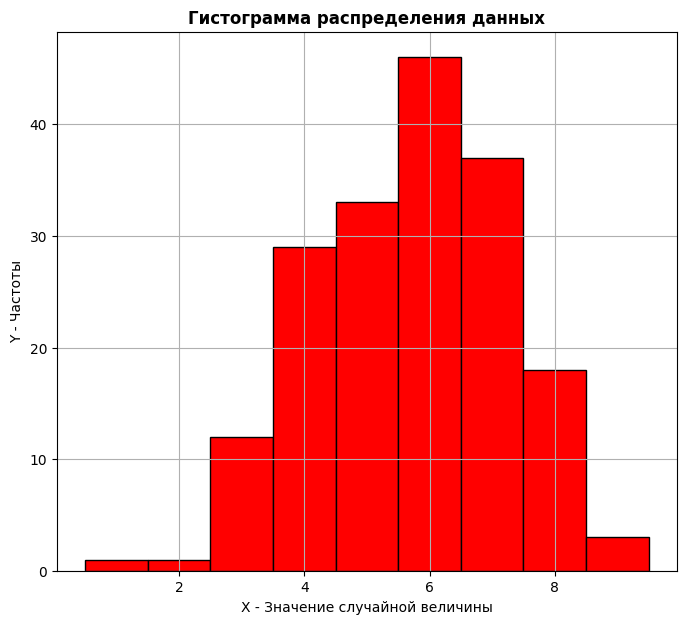

In [ ]:
# Гистограмма распределения данных:

# Настройка графика:
plt.figure(figsize=(8, 7))
plt.grid()

# График:
plt.bar(x=list(range(1, 10)),
        height=len_data,
        width=1,
        edgecolor="black",
        color="red")


plt.xlabel('X - Значение случайной величины')
plt.ylabel('Y - Частоты')
plt.title("Гистограмма распределения данных", fontweight='bold')
plt.show()

In [ ]:
# 2.2 Вычислите статистику Колмогорова.

# Кумулятивный вектор [Теоретическая функция распределения]:
print("Теоретическая функция распределения:", *cumsum_vector, sep='\n')

# Накопленные частоты [Эмпирическая функция распрделения]:
print("\nЭмпирическая функция распределения:", *cumulative_data_vector, sep='\n')

# Вектор модулей разности Эмпирической и Теоретиеской функций распрделения:
difference_modules = [round(abs(x - y), 8) for x, y in zip(cumsum_vector, cumulative_data_vector)]
print("\nМодуль разности:", *difference_modules, sep='\n')

# Вычисление статистики Колмогорова: sup|𝐹̂𝑛(𝑥) - 𝐹(𝑥)|
print("\nЗначение статистики Колмогорова:", max(difference_modules))
print("\nВывод:\nЗначение статистики Колмогорова получилось небольшим, \nчто может говорить о приемлимом результате моделирования.")

Теоретическая функция распределения:
0.00065536
0.00851968
0.04980736
0.1736704
0.4059136
0.68460544
0.89362432
0.98320384
1.0

Эмпирическая функция распределения:
0.005555555555555556
0.011111111111111112
0.07777777777777778
0.2388888888888889
0.4222222222222222
0.6777777777777778
0.8833333333333333
0.9833333333333333
1.0

Модуль разности:
0.0049002
0.00259143
0.02797042
0.06521849
0.01630862
0.00682766
0.01029099
0.00012949
0.0

Значение статистики Колмогорова: 0.06521849

Вывод:
Значение статистики Колмогорова получилось небольшим, 
что может говорить о приемлимом результате моделирования.


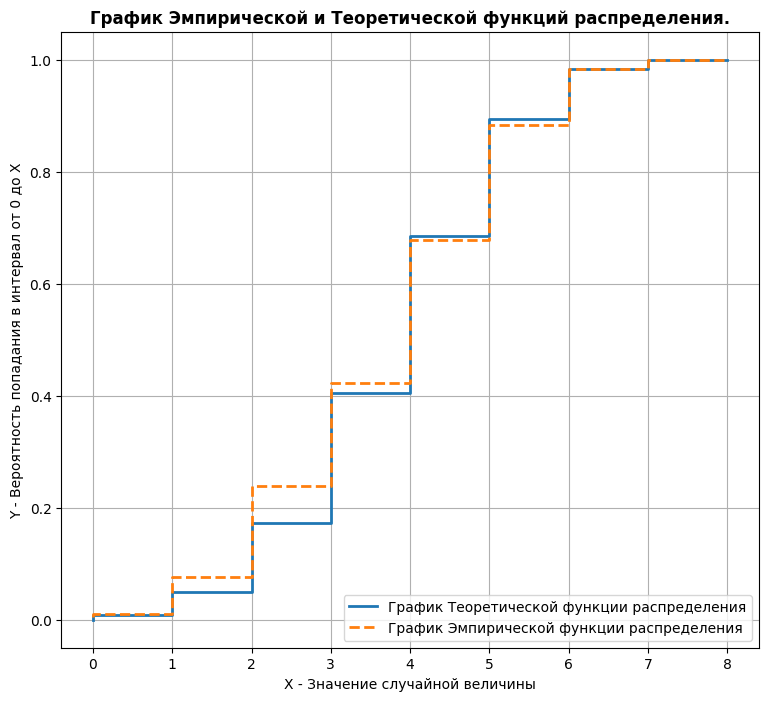

In [ ]:
# 2.3 Постройте на одном рисунке графики 𝐹(𝑥) и 𝐹̂𝑛(𝑥).

# Настройка графика:
plt.figure(figsize=(9,8))

# График Теоретической функции распределения:
plt.step(k_vector,
         cumsum_vector,
         where='pre',
         linewidth=2,
         label="График Теоретической функции распределения")

# График Эмпирической функции распределения:
plt.step(k_vector,
         cumulative_data_vector,
         where='pre',
         linewidth=2,
         label="График Эмпирической функции распределения",
         linestyle="dashed")

# Приписочки:
plt.grid()
plt.legend(loc="lower right")
plt.title("График Эмпирической и Теоретической функций распределения.", fontweight = 'bold')
plt.xlabel('X - Значение случайной величины')
plt.ylabel('Y - Вероятность попадания в интервал от 0 до X')

# Вывод графика:
plt.show()

In [ ]:
# 3. Вычислите выборочное среднее и выборочную дисперсию и сравните с истинными значениями этих характеристик.

# Выборочное среднее:
M_xi_data = np.mean(data_x)
print("1.1: Значение выборочного среднего: ", M_xi_data)

# Теоретическое математическое ожидание:
M_xi = 8 * 0.6 # n * p
print("\n1.2: Теоретическое мат. ожидание:", M_xi)

# Выборочная дисперсия:
S_2 = sum([(data_x[i] - M_xi_data) ** 2 for i in range(len(data_x))]) / 179
print("\n2.1: Выборочная дисперсия:", S_2)

# Теоретическая дисперсия:
D_xi = 8 * 0.6 * (1 - 0.6) # n * p * (1 - p) [ЗЫ.СЫ. (npq)]
print("\n2.2: Теоретическая дисперсия:", D_xi)

# Сравнение характеристик:
print("\nМодуль разности Выборочного среднего и Теоретического мат. ожидания", abs(M_xi_data - M_xi), "- достаточно мало.")
print("Корень квадратный из отношения выборочной дисперсии к теоретичской", (S_2 / D_xi) ** (1/2), "- близко к единице")

# Вывод:
print("\nВывод:\nМожно сделать вывод о том, что результаты моделирования можно считать удовлетворительными.")

1.1: Значение выборочного среднего:  4.7

1.2: Теоретическое мат. ожидание: 4.8

2.1: Выборочная дисперсия: 2.334078212290505

2.2: Теоретическая дисперсия: 1.92

Модуль разности Выборочного среднего и Теоретического мат. ожидания 0.09999999999999964 - достаточно мало.
Корень квадратный из отношения выборочной дисперсии к теоретичской 1.102572326683366 - близко к единице

Вывод:
Можно сделать вывод о том, что результаты моделирования можно считать удовлетворительными.
